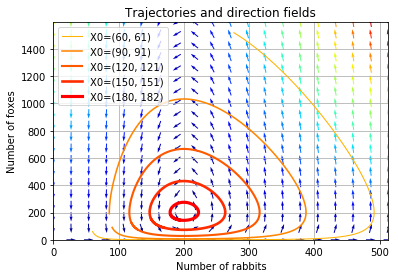

In [15]:
from numpy import *
import pylab as p
from scipy import integrate
a = 0.222
b = 0.0011
c = 1.999
d = 0.010
x0 = 199
y0 = 21
trange = 11
h = 0.0001
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*X[0]*X[1] ])
#equilibrium
X_f0 = array([     0. ,  0.])
X_f1 = array([c/d, a/b])
t = arange(0, trange + h,  h)              # time
X0 = array([x0, y0])                     # initials conditions: 10 rabbits and 5 foxes  

X, infodict = integrate.odeint(dX_dt, X0, t, full_output=True)


# The populations are indeed periodic, and their period is near to the T_f1 we calculated.
# 
# == Plotting direction fields and trajectories in the phase plane ==
# 
# We will plot some trajectories in a phase plane for different starting
# points between X__f0 and X_f1.
# 
# We will use matplotlib's colormap to define colors for the trajectories.
# These colormaps are very useful to make nice plots.
# Have a look at [http://www.scipy.org/Cookbook/Matplotlib/Show_colormaps ShowColormaps] if you want more information.
# 
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory

f2 = p.figure()

#-------------------------------------------------------
# plot trajectories
for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )

#-------------------------------------------------------
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1] 
nb_points   = 20                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M                                  

#-------------------------------------------------------
# Drow direction fields, using matplotlib 's quiver function
# I choose to plot normalized arrows and to use colors to give information on
# the growth speed
p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')


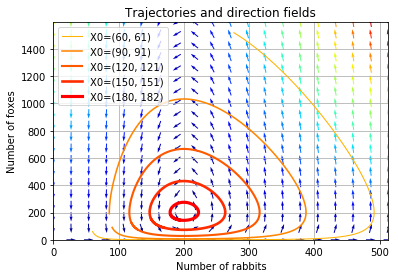

In [16]:
from numpy import *
import pylab as p
from scipy import integrate
a = 0.222
b = 0.0011
c = 1.999
d = 0.010
x0 = 199
y0 = 21
trange = 11
h = 0.0001
def dX_dt(X, t=0):
    """ Return the growth rate of fox and rabbit populations. """
    return array([ a*X[0] -   b*X[0]*X[1] ,  
                  -c*X[1] + d*X[0]*X[1] ])
#equilibrium
X_f0 = array([     0. ,  0.])
X_f1 = array([c/d, a/b])
t = arange(0, trange + h,  h)              # time
X0 = array([x0, y0])                     # initials conditions: 10 rabbits and 5 foxes  
#---
values  = linspace(0.3, 0.9, 5)                          # position of X0 between X_f0 and X_f1
vcolors = p.cm.autumn_r(linspace(0.3, 1., len(values)))  # colors for each trajectory
f2 = p.figure()
for v, col in zip(values, vcolors): 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         # we don't need infodict here
    p.plot( X[:,0], X[:,1], lw=3.5*v, color=col, label='X0=(%.f, %.f)' % ( X0[0], X0[1]) )
# define a grid and compute direction at each point
ymax = p.ylim(ymin=0)[1]                        # get axis limits
xmax = p.xlim(xmin=0)[1] 
nb_points   = 20                      

x = linspace(0, xmax, nb_points)
y = linspace(0, ymax, nb_points)

X1 , Y1  = meshgrid(x, y)                       # create a grid
DX1, DY1 = dX_dt([X1, Y1])                      # compute growth rate on the gridt
M = (hypot(DX1, DY1))                           # Norm of the growth rate 
M[ M == 0] = 1.                                 # Avoid zero division errors 
DX1 /= M                                        # Normalize each arrows
DY1 /= M                                  

p.title('Trajectories and direction fields')
Q = p.quiver(X1, Y1, DX1, DY1, M, pivot='mid', cmap=p.cm.jet)
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.legend()
p.grid()
p.xlim(0, xmax)
p.ylim(0, ymax)
f2.savefig('rabbits_and_foxes_2.png')


In [11]:
# == Plotting contours ==
# 
# We can verify that the function IF defined below remains constant along a trajectory:
# 
def IF(X):
    u, v = X
    return u**(c/a) * v * exp( -(b/a)*(d*u+v) )

# We will verify that IF remains constant for different trajectories
for v in values: 
    X0 = v * X_f1                               # starting point
    X = integrate.odeint( dX_dt, X0, t)         
    I = IF(X.T)                                 # compute IF along the trajectory
    I_mean = I.mean()
    delta = 100 * (I.max()-I.min())/I_mean
    print ('X0=(%2.f,%2.f) => I ~ %.1f |delta = %.3G %%' % (X0[0], X0[1], I_mean, delta))

# >>> X0=( 6, 3) => I ~ 20.8 |delta = 6.19E-05 %
#     X0=( 9, 4) => I ~ 39.4 |delta = 2.67E-05 %
#     X0=(12, 6) => I ~ 55.7 |delta = 1.82E-05 %
#     X0=(15, 8) => I ~ 66.8 |delta = 1.12E-05 %
#     X0=(18, 9) => I ~ 72.4 |delta = 4.68E-06 %
# 


X0=(60,61) => I ~ 8164715229920062250942464.0 |delta = 1.54E+03 %
X0=(90,91) => I ~ 1347033820150436806524928.0 |delta = 1.09E+03 %
X0=(120,121) => I ~ 307822211021430199418880.0 |delta = 769 %
X0=(150,151) => I ~ 91612403716032848461824.0 |delta = 499 %
X0=(180,182) => I ~ 42141388227643522940928.0 |delta = 205 %


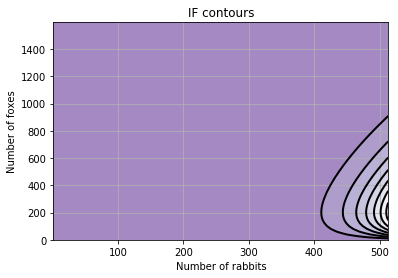

In [8]:
# Potting iso-contours of IF can be a good representation of trajectories,
# without having to integrate the ODE
# 
#-------------------------------------------------------
# plot iso contours
nb_points = 80                              # grid size 

x = linspace(0, xmax, nb_points)    
y = linspace(0, ymax, nb_points)

X2 , Y2  = meshgrid(x, y)                   # create the grid
Z2 = IF([X2, Y2])                           # compute IF on each point

f3 = p.figure()
CS = p.contourf(X2, Y2, Z2, cmap=p.cm.Purples_r, alpha=0.5)
CS2 = p.contour(X2, Y2, Z2, colors='black', linewidths=2. )
p.clabel(CS2, inline=1, fontsize=16, fmt='%.f')
p.grid()
p.xlabel('Number of rabbits')
p.ylabel('Number of foxes')
p.ylim(1, ymax)
p.xlim(1, xmax)
p.title('IF contours')
f3.savefig('rabbits_and_foxes_3.png')
p.show()
# 
# 
# # vim: set et sts=4 sw=4:
